In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('gss_filtered.csv')

C:\Users\cynth\AppData\Local\Temp\ipykernel_20612\2936053992.py:4: DtypeWarning: Columns (3,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('gss_filtered.csv')


**Dataset and research question**

The dataset used for this project is the General Social Survey, a survey that has been conducted annually since 1972. The motivation behind this survey is to examine Americans’ social and economic views, and how they have changed over time. An important question that could be derived from this dataset is, “How does household income when you were growing up affect your adult life?” We use the variable ‘incom16’ as the foundation to our question, along with 3 variables to represent factors of “adult life,” like education, arrests, and marital status.

In [2]:
df.shape

(72390, 8)

In [3]:
df.head()

,Unnamed: 0,divorce,incom16,arrest,rincome,educ,ticket,marital
0,0,NaN,average,NaN,NaN,16.0,NaN,never married
1,1,no,above average,NaN,NaN,10.0,NaN,married
2,2,no,average,NaN,NaN,12.0,NaN,married
3,3,no,average,NaN,NaN,17.0,NaN,married
4,4,no,below average,NaN,NaN,12.0,NaN,married


In [4]:
# Cleaned arrest

df['arrest'].unique()
df = df[df['arrest'].notna()].replace('no',0).replace('yes',1).replace('refused_(3)',np.nan)
df = df[df['arrest'].notna()]
df['arrest'].unique()

array([0., 1.])

In [5]:
df['rincome'].unique()

array([nan, '$1,000 to $2,999', '$15,000 to $19,999', '$7,000 to $7,999',
       '$8,000 to $9,999', '$20,000 to $24,999', '$4,000 to $4,999',
       '$10,000 to $14,999', '$25,000 or more', '$3,000 to $3,999',
       'under $1,000', '$5,000 to $5,999', '$6,000 to $6,999'],
      dtype=object)

In [6]:
# Cleaned data of rincome

df = df[df['rincome'].notna()].replace('$1,000 to $2,999', 1).replace('$15,000 to $19,999',9).replace('$7,000 to $7,999',6).replace('$8,000 to $9,999',7).replace('$20,000 to $24,999',10).replace('$4,000 to $4,999',3).replace('$10,000 to $14,999',8).replace('$25,000 or more',11).replace('$3,000 to $3,999',2).replace('under $1,000',0).replace('$5,000 to $5,999',4).replace('$6,000 to $6,999',5)

In [7]:
# Cleaned data of incom16

df['incom16'].unique()
df = df[df['incom16'].notna()].replace('far below average',0).replace('below average',1).replace('average',2).replace('above average',3).replace('far above average',4)
df.head()

,Unnamed: 0,divorce,incom16,arrest,rincome,educ,ticket,marital
3117,3117,0.0,3,0.0,1,14.0,0.0,married
3118,3118,0.0,2,0.0,9,16.0,1.0,married
3121,3121,NaN,2,0.0,6,12.0,1.0,never married
3122,3122,0.0,2,0.0,7,16.0,1.0,married
3123,3123,0.0,1,0.0,10,17.0,1.0,married


In [8]:
# Cleaned marital variable

df['marital'].unique()
df['marital'] = df['marital'].replace('married',0).replace('never married',0).replace('widowed',0).replace('divorced',1).replace('separated',1)
df['marital'].unique()

array([0, 1], dtype=int64)

In [9]:
df.head()

,Unnamed: 0,divorce,incom16,arrest,rincome,educ,ticket,marital
3117,3117,0.0,3,0.0,1,14.0,0.0,0
3118,3118,0.0,2,0.0,9,16.0,1.0,0
3121,3121,NaN,2,0.0,6,12.0,1.0,0
3122,3122,0.0,2,0.0,7,16.0,1.0,0
3123,3123,0.0,1,0.0,10,17.0,1.0,0


In [10]:
df = df.drop('divorce',axis=1).drop('rincome',axis=1)
df.head()

,Unnamed: 0,incom16,arrest,educ,ticket,marital
3117,3117,3,0.0,14.0,0.0,0
3118,3118,2,0.0,16.0,1.0,0
3121,3121,2,0.0,12.0,1.0,0
3122,3122,2,0.0,16.0,1.0,0
3123,3123,1,0.0,17.0,1.0,0


In [11]:
print(df.isna().sum())

Unnamed: 0     0
incom16        0
arrest         0
educ          10
ticket         8
marital        0
dtype: int64


In [12]:
# Cleaned ticket variable

df = df[df['ticket'].notna()]
df['ticket'].unique()

array([0., 1.])

In [13]:
# Cleaned education variable part 1

df = df[df['educ'].notna()]
df['educ'].unique()

array([14., 16., 12., 17., 11.,  8.,  9., 15., 13., 10., 20., 18.,  7.,
       19.,  0.,  4.,  6.,  5.,  3.,  2.,  1.])

In [14]:
df.head()

,Unnamed: 0,incom16,arrest,educ,ticket,marital
3117,3117,3,0.0,14.0,0.0,0
3118,3118,2,0.0,16.0,1.0,0
3121,3121,2,0.0,12.0,1.0,0
3122,3122,2,0.0,16.0,1.0,0
3123,3123,1,0.0,17.0,1.0,0


In [15]:
# Cleaned education variable part 2

def educ(x):
    if (0 <= x <= 11):
        return 0
    elif(x == 12):
        return 1
    elif(13 <= x <=15):
        return 2
    elif(x == 16):
        return 3
    elif(x > 16):
        return 4
df['educ'] = df['educ'].apply(educ)
df.head()

,Unnamed: 0,incom16,arrest,educ,ticket,marital
3117,3117,3,0.0,2,0.0,0
3118,3118,2,0.0,3,1.0,0
3121,3121,2,0.0,1,1.0,0
3122,3122,2,0.0,3,1.0,0
3123,3123,1,0.0,4,1.0,0


**Variable summary**

|Variable Name |Description |Responses |Variable values (original == transformed) |
| ------------ | ---------- | -------- |------------------------------------------|
|Income16 |At the age of 16, compared with average American families at that time, how would you rate your family income? |Far below average, Below average, Average Above average, Far above average, Lived in institution, Don’t know, No answer, Not applicable |Far below average == 0, Below average == 1, Average == 2, Above average == 3, Far above average == 4|
|Educ|What is the highest year of school completed?|Responses are given corresponding to grade level.For K-12 grades the responses  are from 0-12. For higher education, responses of 13-15 is some college, 16 is bachelors, and 17-20 is beyond a bachelors. |0-11 == 0 (did not complete high school), 12 == 1 (completed high school), 13-15 == 2 (some college), 16 == 3 (bachelor’s degree), 17-20 == 4 (greater than bachelor’s)|
|Arrest|Were you ever picked up, or charged, by the police, for any (other) reason whether or not you are guilty?|Yes, No, Refused, Don’t know, No answer, Not applicable|No == 0, Yes == 1, Dropped the rest of the responses|
|Marital |Are you currently--married, widowed, divorced, separated, or have you never been married? | Married, Widowed, Divorced, Separated, Never married|Married, Widowed, Never married == 0, Divorced, Separated == 1 |


**Challenges when working with data**

We had reading challenges because of the size of the data itself; it caused issues with loading the entirety of the dataset. The dataset was too big for Colab to handle and would not include all of the rows that we needed. For example, when looking at the shape of gss.csv on Colab, it would read as having only 390 rows, which we know was not true. To fix this issue, we downloaded the entire dataset locally and used Visual Studio Code to filter our data and save a new CSV file. We imported this new dataset into Rivanna for cleaning and visualization. 

We also had challenges with understanding/preparing our arrest variable. The arrest question was only asked if the respondent had answered yes to receiving a traffic ticket. This means that the arrest variable does not account for people who have committed more serious crimes, but did not receive a traffic ticket. We looked at other variables that may include a larger number of respondents, such as convicted or locked-up, but those questions only had responses for 2012. Even though it is a smaller subset, it provides us enough information about arrests to allow us to form relationships between arrest and income. 

Issues we had with cleaning was making the column values numerical or binary. For example, we turned the marital column into the binary. We set marital == 0 if the response was “married,” “never married,” and “widowed,” and marital == 1 if the response was “divorced” or “separated.” The “Variable values” column in our previous table describes how we transformed the rest of our variables. For the arrest variable, we dropped responses that were “Refused,” “Don’t know,” “No answer,” and “Not applicable” since we could not find any previous questions that would allude to setting either of these values as “yes” or “no.”


In [16]:
import seaborn as sns

In [17]:
var1 = 'incom16'
var2 = 'arrest'
var3 = 'educ'
var4 = 'ticket'
var5 = 'marital'

# sns.countplot(data=df, x=var1, hue = var2)

[Text(0.5, 1.0, 'Childhood Income vs. Likeliness of Arrest'),
 Text(0, 0.5, 'Percentage'),
 Text(0.5, 0, 'Childhood income')]

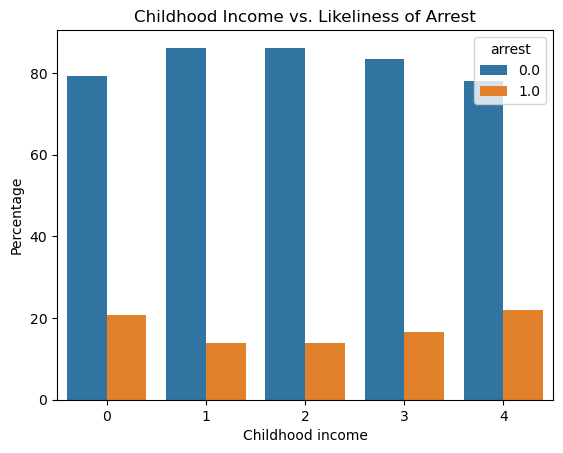

In [39]:
# plot incom16 and arrest

# create a function to determine percentage, code helped with chatgpt
def calculate_percentages(group):
    total_count = group.sum()
    return 100 * group / total_count

# Calculate percentages for each combination of var1 and var2
grouped_data = df.groupby([var1, var2]).size().unstack()
percentage_data = grouped_data.apply(calculate_percentages, axis=1).stack().reset_index(name="Percentage")

# Create the countplot
sns.barplot(data=percentage_data, x=var1, y="Percentage", hue=var2).set(title = 'Childhood Income vs. Likeliness of Arrest', ylabel='Percentage', xlabel = 'Childhood income')

In [19]:
# Incom16 grouped by arrest
#df.groupby(['incom16','arrest']).size().unstack().plot(kind='bar',stacked=True)

[Text(0.5, 1.0, 'Childhood Income vs. Highest Attained Education Level'),
 Text(0, 0.5, 'Percentage'),
 Text(0.5, 0, 'Childhood income')]

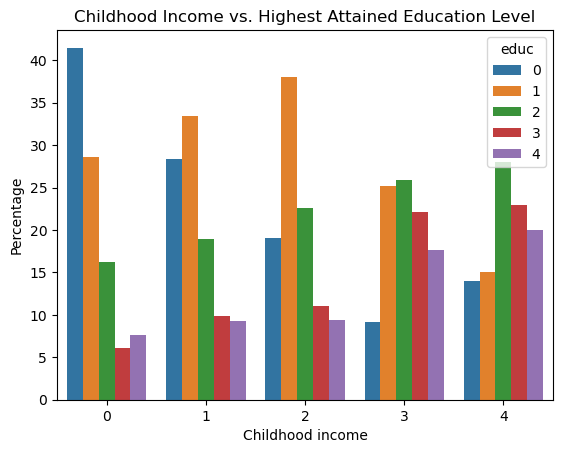

In [40]:
# Incom16 grouped by education

grouped_data = df.groupby([var1, var3]).size().unstack()
percentage_data = grouped_data.apply(calculate_percentages, axis=1).stack().reset_index(name="Percentage")

sns.barplot(data=percentage_data, x=var1, y="Percentage", hue=var3).set(title='Childhood Income vs. Highest Attained Education Level', ylabel ='Percentage', xlabel = 'Childhood income')
 


#ptable = df.groupby(['incom16','educ']).size().unstack()
#ax = ptable.plot(kind='bar',stacked=True)
#sns.countplot(data=df, x=var1, hue = var3)


ValueError: could not convert string to float: 'incom16'

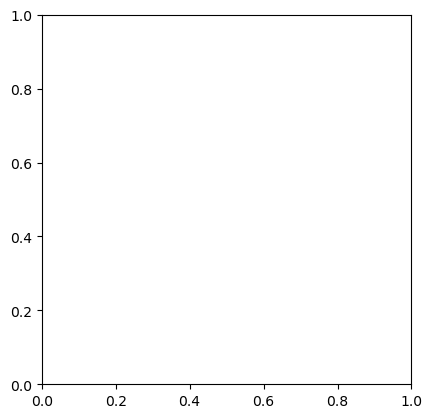

In [51]:
# create pie charts as another way to visualize the education level data, since it is more complicated
import matplotlib.pyplot as plt

grouped_data = df.groupby([incom16, var3]).size().unstack()
percentage_data = grouped_data.apply(calculate_percentages, axis=1).stack().reset_index(name="Percentage")

colors = sns.color_palette('pastel')[0:5]
labels = ['Did not finish high school', 'Finished highschool', 'Some college', 'Bachelors', 'Greater than bachelors']

plt.pie(var1, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

[Text(0.5, 1.0, 'Childhood Income vs. Likelihood of Divorce'),
 Text(0, 0.5, 'Percentage'),
 Text(0.5, 0, 'Childhood income')]

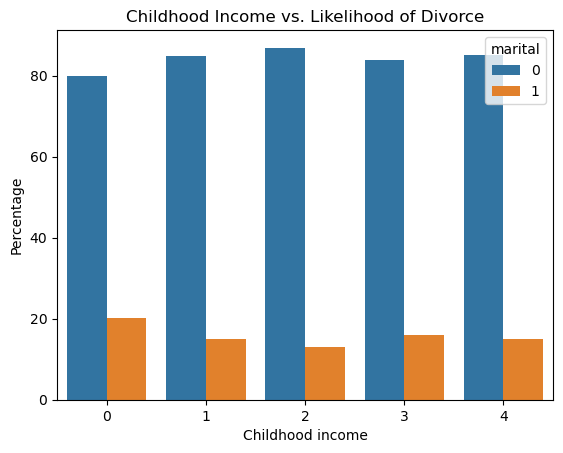

In [42]:
# Incom16 grouped by divorce
#group_by = 'incom16'
#var = 'marital'
#df_wide = df.pivot(columns=group_by,values=var)
#df_wide.plot.density()
#df_wide.loc[:,['0','1','2','3','4']].plot.density()
#df.groupby(['incom16','marital']).size().unstack().plot(kind='bar',stacked=True)

grouped_data = df.groupby([var1, var5]).size().unstack()
percentage_data = grouped_data.apply(calculate_percentages, axis=1).stack().reset_index(name="Percentage")

sns.barplot(data=percentage_data, x=var1, y="Percentage", hue=var5).set(title='Childhood Income vs. Likelihood of Divorce', ylabel = 'Percentage', xlabel = 'Childhood income')

#get divorce percentages GIVEN person is married